<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U2_MH2_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Perform customer segmentation using bank data into distinct categories based on their behavioral patterns

## Learning Objectives

At the end of the experiment, you will be able to:

* Understand clustering
* Find groups or clusters using K-means algorithm
* Visualize the high-dimensional data to low-dimensional data (2D) by applying t-SNE algorithm

In [ ]:
#@title  Mini Hackathon Walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/Customer_Segmentation.mp4" type="video/mp4">
</video>
""")

## Domain Information

- **Customer segmentation** refers to the process of dividing a set of potential customers into groups (or segments) based on shared attributes, interests, and behaviors.
- One of the key pain points for bank marketing team is to know their customers and identify their needs.
- For this mini-hackathon, we will use the popular **K-Means clustering** algorithm to segment customers based on their behavior from the bank data. The basic concept is that consumers who share common traits would respond to marketing communication in a similar way so that the bank marketing team can reach out to each group in a relevant and effective way.

## Dataset

### Description

The dataset chosen for this mini hackathon is the behavior of customers in the bank for 6 months, this dataset is made up of 13 features.

**Attribute Information**

- **CUSTID:** Identification of Credit Cardholder
- **BALANCE:** Balance amount left in customer's account to make purchases
- **PURCHASES:** Amount of purchases made from the account
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment
- **CASH_ADVANCE:** Cash in advance given by the user
- **PURCHASES_FREQUENCY:** How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX:** Number of Transactions made with "Cash in Advance"
- **CREDIT_LIMIT:** Limit of Credit Card for user
- **PAYMENTS:** Amount of Payment done by a user
- **MINIMUM_PAYMENTS:** Minimum amount of payments made by a user
- **PRC_FULL_PAYMENT:** Percent of full payment paid by a user
- **TENURE:** Tenure of credit card service for user

**Note:** The currency values mentioned above are in "dollars"

## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()

notebook="U2_MH2_Customer_Segmentation" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Marketing_data_clustering.csv")
    print ("Setup completed successfully")
    return

setup()

Setup completed successfully


### Importing Required Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## **Stage 1:** Data Pre-Processing (2 Marks)

- Replace the missing values in any other column appropriately with mean / median / mode.

  Hint: Use pandas [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function to replace the missing values

- Perform correlation on the data features and remove highly correlated features from the data
  
  Hint: Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

- Drop any unwanted columns
  
  Hint: Use pandas [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- Perform `StandardScaler()` on the data features
  
  Hint: Use Sklearns [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
df = pd.read_csv('Marketing_data_clustering.csv')

# Loop thru each column in the df, identify is there are missing values, check for outliers, apply mean, median & mode accordingly
def fill_Missing_Values(df):
  for column in df.columns:
    #Check of any missing values in this column
    if df[column].isna().any():
      print(f"{column} has missing values")
      # Calculate Z-scores for the column
      z_scores = np.abs(stats.zscore(df[column]))

      # Identify outliers (Z-scores > 3)
      outliers = df[z_scores > 3]

      # There are any outliers
      if not outliers.empty:
        print(f"Identified outliers")
        # Apply 'median' imputation if column is of numerical type
        if df[column].dtype != 'object':
          print(f"Applying median")
          df.fillna({column: df[column].median()}, inplace=True)
      #There are no outliers
      else:
        print(f"No outliers identified")
        if df[column].dtype == 'object':
          # Apply 'mode' imputation if column is of textual type
          print(f"Applying mode as column is not numerical")
          df.fillna({column: df[column].mode()[0]}, inplace=True)
        else:
          # Apply 'mean' imputation if column is of numerical type
          print(f"Applying mean as column is numerical")
          df.fillna({column: df[column].mean()}, inplace=True)
  return df

def remove_Highly_Correlated(df, bar=0.9):
  # Creates correlation matrix
  corr = df.corr()

  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  tri_df = corr.mask(mask)

  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("length of highly correlated columns",len(highly_cor_col))
  print("List of highly correlated columns",highly_cor_col)

  # Drop the highly correlated columns
  reduced_df = df.drop(highly_cor_col, axis = 1)
  print("shape of data",df.shape,"shape of reduced data",reduced_df.shape)
  return reduced_df

#Fill Missing values in the df
cleanedDF = fill_Missing_Values(df)

#dropping unnecessary columns
cleanedDF.drop(columns=['CUST_ID','TENURE'], inplace=True)

#Remove highly co-related columns
cleanedDF = remove_Highly_Correlated(cleanedDF)

scaler = StandardScaler()
scaledDF = scaler.fit_transform(cleanedDF)

print(scaledDF)

MINIMUM_PAYMENTS has missing values
No outliers identified
Applying mean as column is numerical
length of highly correlated columns 1
List of highly correlated columns ['CASH_ADVANCE_FREQUENCY']
shape of data (2994, 11) shape of reduced data (2994, 10)
[[-1.13359969 -0.63261322 -0.31715131 ... -0.88170901 -0.94317715
  -0.41444166]
 [-0.37630323 -0.8116596  -0.6893926  ... -0.19700475 -0.64209751
  -0.41444166]
 [ 0.60436139  0.13588811  1.01261629 ... -0.19595539  0.1793477
  -0.41444166]
 ...
 [-1.15745725  0.14783957  0.5467294  ... -0.47832047 -1.08096394
   4.45174987]
 [-1.1077884  -0.18251679  0.46166798 ... -0.81864971 -0.86420132
   3.9651351 ]
 [-0.87406153  1.20272491  1.26155753 ...  0.18367824 -0.82950517
  -0.41444166]]


## **Stage 2:** K Means (3 Marks)

- Find the right number of clusters to be chosen using the elbow method
  
- Perform K-Means on the chosen optimal number of clusters

  **Hint:** Refer to this [link](https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac) for finding the k-clusters using elbow method and applying kmeans

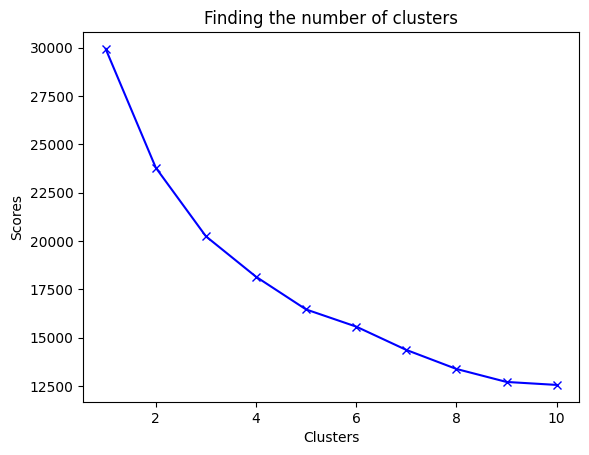

In [ ]:
#Applying Elbow method to find right number of clusters

def plot_Clusters(df):
  scores = []

  for i in range(1, 11):
    #kmeans = KMeans(n_clusters = i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    scores.append(kmeans.inertia_)

  plt.plot(range(1, 11), scores, 'bx-')
  plt.title('Finding the number of clusters')
  plt.xlabel('Clusters')
  plt.ylabel('Scores')
  plt.show()

plot_Clusters(scaledDF)

# From the above Elbow Method we can choose the number of clusters as 4,5 or 6

##Fitting kmeans to the dataset with k=4
#km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
#df['Cluster'] = km4.fit_predict(scaledDF)

#km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
#df['Cluster']= km5.fit_predict(scaledDF)

km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = km6.fit_predict(scaledDF)

#km8=KMeans(n_clusters=8,init='k-means++', max_iter=300, n_init=10, random_state=0)
#df['Cluster'] = km8.fit_predict(scaledDF)

#km10=KMeans(n_clusters=10,init='k-means++', max_iter=300, n_init=10, random_state=0)
#df['Cluster'] = km10.fit_predict(scaledDF)

## **Stage 3:** Apply **TSNE** with 2 components (n_components = 2) and visualize the clusters (3 Marks)

Hint: Use Sklearns [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

**Note:** Produce a visualization with distinctly isolated clusters and It is not necessary to plot the centroids



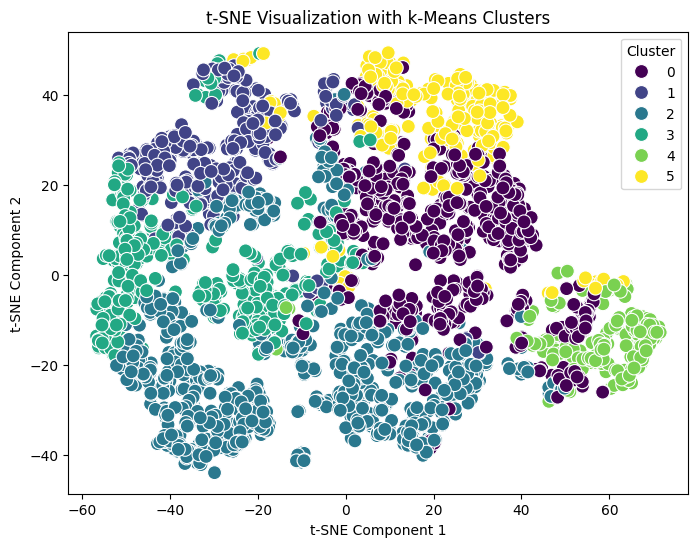

In [ ]:
tsne_data = TSNE(n_components=2).fit_transform(scaledDF)

df['TSNE1'] = tsne_data[:, 0]
df['TSNE2'] = tsne_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
   x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='viridis', s=100
)
plt.title('t-SNE Visualization with k-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()

## **Stage 4:** Insights for each cluster

#### **Stage 4(a)** (1 Mark):
- To understand the behavior of the customers from each cluster print the respective centroid point values obtained from the scaled dataframe
- Get the original representation of the scaled centroid points using [inverse_transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform) technique

In [ ]:
scaled_centroids = km6.cluster_centers_

print("Centroids after Scale:\n", scaled_centroids)

# Transform centroids back to the original scale
original_centroids = scaler.inverse_transform(scaled_centroids)

# Display centroids in original scale
centroids_df = pd.DataFrame(original_centroids, columns=cleanedDF.columns)
#print("Centroids in Original Scale:\n", centroids_df)
centroids_df

Centroids after Scale:
 [[-5.19798864e-01  3.81228446e-01  3.66764414e-01 -5.46204987e-01
   8.84822410e-01 -5.65797927e-01 -1.54827587e-01 -2.55017836e-01
  -3.68487659e-01 -2.03972396e-01]
 [ 1.83442093e+00 -2.69093221e-01 -4.20005514e-01  4.58297685e-01
  -4.03106077e-01  3.62032277e-01  9.56502630e-01  3.32245940e-01
   1.59165348e+00 -4.00578774e-01]
 [-2.40969921e-01 -5.75878713e-01 -6.08152282e-01 -3.34540795e-01
  -7.37897993e-01 -1.93422254e-01 -3.42025946e-01 -4.47771526e-01
  -2.75525754e-01 -2.77991605e-01]
 [ 1.88111683e-01 -4.87207002e-01 -5.16304920e-01  1.62276121e+00
  -6.78787138e-01  1.48071353e+00 -1.19700469e-01  7.39235219e-01
  -1.99112941e-02  2.02919947e-03]
 [-1.03696307e+00  3.57164744e-01  5.81626048e-01 -4.68166912e-01
   9.13118977e-01 -5.53842279e-01  1.89138176e-01 -8.10425892e-02
  -8.54592269e-01  3.06238615e+00]
 [ 2.20607236e-01  1.80382731e+00  2.01594758e+00 -2.54816368e-01
   1.24774778e+00 -2.93469281e-01  3.92804603e-01  6.31642935e-01
   4.5707

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,670.520514,544.998752,270.677604,62.149701,0.721545,0.406026,2816.929699,637.959473,340.467062,0.014417
1,3085.413518,256.606769,69.039972,714.962514,0.241876,2.654596,5509.331476,1046.676628,1025.888720,0.000950
2,956.535466,120.559516,20.820706,199.707420,0.117187,1.308468,2363.407258,503.808955,372.973957,0.009347
3,1396.675408,159.881919,44.359842,1471.731745,0.139202,5.365688,2902.031603,1329.928392,462.357157,0.028528
4,140.027898,534.327450,325.743500,112.865599,0.732083,0.435000,3650.250000,759.040784,170.486125,0.238162
5,1430.008439,1175.865182,693.339142,251.519256,0.856711,1.066007,4143.669367,1255.047539,629.148770,0.016717


In [ ]:
centroids_df.describe()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1279.863541,465.373264,237.330128,468.822706,0.468101,1.872631,3564.269900,922.076962,500.220299,0.051353
std,1007.101235,392.860941,256.635398,543.717494,0.336877,1.897343,1145.906530,339.113238,298.268607,0.091965
min,140.027898,120.559516,20.820706,62.149701,0.117187,0.406026,2363.407258,503.808955,170.486125,0.000950
25%,742.024252,184.063131,50.529875,134.576054,0.164871,0.592752,2838.205175,668.229801,348.593786,0.010614
50%,1176.605437,395.467109,169.858788,225.613338,0.481710,1.187237,3276.140801,902.858706,417.665557,0.015567
75%,1421.675181,542.330926,311.977026,599.101700,0.729449,2.318064,4020.314525,1202.954812,587.450867,0.025575
max,3085.413518,1175.865182,693.339142,1471.731745,0.856711,5.365688,5509.331476,1329.928392,1025.888720,0.238162


#### **Stage 4(b)** (1 Mark):
- Report your observations in the form of text, about the customers based on the centroid points

Hint: If require use [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

In [ ]:
# YOUR ANALYSIS HERE


# Cluster 0
# Group with frequent purchases with minimum cash advances and transactions

# Cluster 1
# Observations : High Balance, High Credit Limit, Higher Min Payments

# Cluster 2:   Poor Shoppers
# Group with Lowest purchases, installements, purchase fequency and payments.

# Cluster 3 :
# Group with lower purchases but preferred to pay cash in advance(High cash advTransactions) and make higher payments.

# Cluster 4 = Low balance frequent shoppers.
# Group with lower balance customers making frequent purchases who make lesser minimum payments and high percentage of full payment

# Cluster 5 =
# High Spending (Based on purchases and its frequency), with High credit Limit and high installment payments done by the user.